# <center>Laboratorium 4<br>Metod Numerycznych</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, dokonać testu na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

In [1]:
import main

import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt

<a id='zad1'></a>
***Zadanie 1.***   

W celu wykonywania interpolacji należy przygotować funkcję wyliczającą wektor węzłów Czebyszewa (funkcja *chebyshev_nodes*) dany wzorem
  
  $$
  \begin{aligned}
  x(k) = \cos\left(\cfrac{k\pi}{n}\right),\ \ \ k = 0,1,2,...,n
  \end{aligned}
  $$

Oraz wagi barycentryczne dla tego typu wezłów (funkcja def *bar\_czeb\_weights*): 
$$
\begin{aligned}
w_j={}&(-1)^j\delta_j\\
\delta_j={}&
\begin{cases}
\frac{1}{2},\quad j=0\ \mathrm{lub}\ j=n\\
1,\quad j\in(0,n)
\end{cases}
\end{aligned}
$$

<a id='zad2'></a>
***Zadanie 2.***  
Do przeprowadzenia ćwiczenia należy zdefiniować następujące funkcje:  
1. Funkcję ciągłą nieróżniczkowalną: $f(x) = \mathrm{sgn}(x)x+x^2$  
2. Funkcję różniczkowalną jednokrotnie: $f(x) = \mathrm{sgn}(x)x^{2}$  
3. Funkcję różniczkowalną trzykrotnie: $f(x)=|\sin(5 x)|^3$  
4. Trzy funkcje analityczne: $f(x) = \cfrac{1}{1+ax^2}$ dla $a \in \{1,25,100\} $    
5. Funkcję nieciągłą: $f(x) = \mathrm{sgn}(x)$

Funkcje można zaimplementować w notaniku lub w pliku main. Do definicji funkcji w notatniku można użyć [wyrażenia lambda](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions).

In [2]:
f1 = lambda x: np.sign(x) * x + x**2
f2 = lambda x: np.sign(x) * x**2
f3 = lambda x: np.abs(np.sin(5*x))**3
f4_1 = lambda x: (1) / (1 + x**2)
f4_2 = lambda x: (1) / (25 + x**2)
f4_3 = lambda x: (1) / (100 + x**2)
f5 = lambda x: np.sign(x)

***Zadanie 3.***  
Dla funkcji ciągłej nieróżniczkowalnej z [Zadania 2](#zad2) przeprowadzić interpolację metodą  [barycentryczną](https://people.maths.ox.ac.uk/trefethen/barycentric.pdf) przy użyciu funkcji *[barycentric_interpolate](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.interpolate.barycentric_interpolate.html)* z pakietu *[Scipy](https://scipy.org/)* oraz przy użyciu wzoru barycentrycznego podanego na wykładzie (funkcja barycentric_inte w main.py).  

Wykonać w węzłach Czebyszewa interpolację rzędu 10, 100, 1000, 10000, 100000. Wyliczyć wartości wielomianu interpolacyjnego w równoodległych punktach w ilości 1000.  

Wykreślić wykresy obrazujące wyniki interpolacji (wykres oryginalnej funkcji i funkcji interpolującej w 1000 punktów).  

Przeanalizować czas obliczeń w zależności od rzędu interpolacji.  

Przykład użycia funkcji barycentric_interpolate:

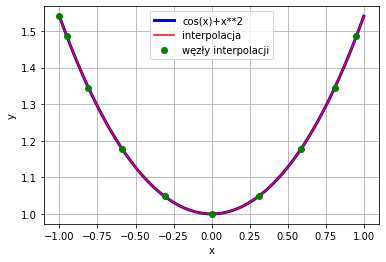

In [3]:
from scipy.interpolate import barycentric_interpolate

# funkcja do interpolacji
f = lambda x: np.cos(x)+x**2

# wektor współrzędnych x dla których chcemy wyliczyć wartości wielomianu interpolacyjnego
x = np.linspace(-1,1,1000)

# węzły Czebyszewa 
interpolation_nodes_number = 10
xch = np.cos(np.linspace(1,interpolation_nodes_number,interpolation_nodes_number)*np.pi/interpolation_nodes_number)

# interpoalcja metodą barycentryczną
yimp = barycentric_interpolate(xch,f(xch),x)

plt.plot(x,f(x),'b',  linewidth=3 ,label = 'cos(x)+x**2')
plt.plot(x,yimp,'r',label = 'interpolacja')
plt.plot(xch,f(xch),'go',label = 'węzły interpolacji')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = 0)
plt.grid()
plt.show()

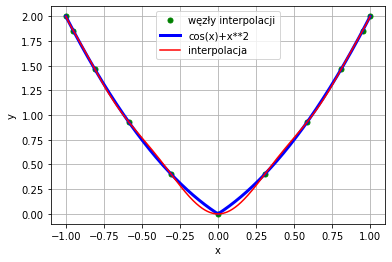

błąd:  0.05921962436810316 rząd interpolacji:  10
Czas wykonywania operacji dla rzędu interpolacji =  10
17.2 ms ± 1.32 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)


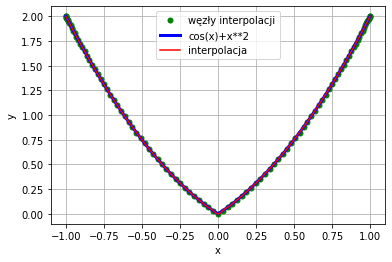

błąd:  0.00596541892441703 rząd interpolacji:  100
Czas wykonywania operacji dla rzędu interpolacji =  100
24.6 ms ± 574 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


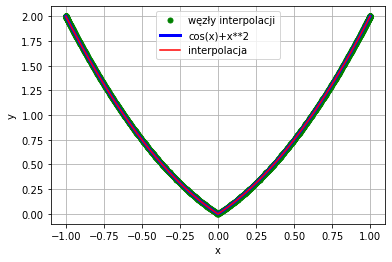

błąd:  0.0005739642836657185 rząd interpolacji:  1000
Czas wykonywania operacji dla rzędu interpolacji =  1000
81.4 ms ± 4.43 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)


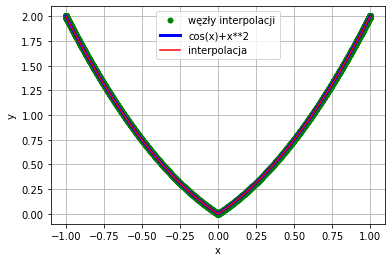

błąd:  8.303505128190447e-06 rząd interpolacji:  10000
Czas wykonywania operacji dla rzędu interpolacji =  10000
956 ms ± 45.2 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)


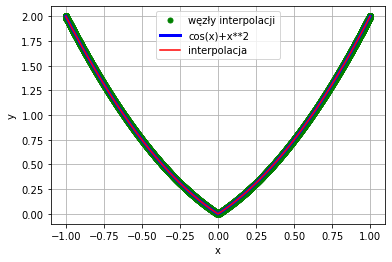

błąd:  6.550513118432424e-08 rząd interpolacji:  100000
Czas wykonywania operacji dla rzędu interpolacji =  100000


In [ ]:
#rozwiazanie 3 + 4.

x = np.linspace(-1, 1, 1000)
y = f1(x)


interpolation_rank = [10, 100, 1000, 10000, 100000]

for nodes_number in interpolation_rank:
    cheb_nodes = main.chebyshev_nodes(nodes_number)
    cheb_weights = main.bar_czeb_weights(nodes_number)
    y_cheb = f1(cheb_nodes)
    yimp = main.barycentric_inte(cheb_nodes, y_cheb, cheb_weights, x)

    plt.plot(cheb_nodes,f1(cheb_nodes),'go', markersize = 5, label = 'węzły interpolacji')
    plt.plot(x,f1(x),'b',  linewidth=3 ,label = 'cos(x)+x**2')
    plt.plot(x,yimp,'r',label = 'interpolacja')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc = 0)
    plt.grid()
    plt.show()

    print("błąd: ", main.L_inf(yimp, y), "rząd interpolacji: ", nodes_number)

    print("Czas wykonywania operacji dla rzędu interpolacji = ", nodes_number)
    saved_timing = %timeit -r 5 -n 10 -o main.barycentric_inte(cheb_nodes, y_cheb, cheb_weights, x)




***Zadanie 4.***  
Do oceny jakości interpolacji stosuje się normę wektorową $l_{\infty}$, dla różnicy wektorów definiujemy ją jako:  
  
$||\mathbf{x_1}-\mathbf{x_2}|| = \sup\{|\mathbf{x_1}-\mathbf{x_2}|\}$  
  
Zaimplementuj normę $l_{\infty}$ jako funkcję w main *L\_inf*. Za jej pomocą zbadaj jakość wszystkich przeprowadzonych interpolacji.

In [ ]:
#rozwiazanie w zad 3.

***Zadanie 5.***  
Dla funkcji jednokrotnie i trzykrotnie różniczkowalnej z [Zadania 2](#zad2). Przeanalizować w pętli jakość interpolacji dla różnych rzędów interpolacji $n$. 
W tym celu należy wyliczyć wartość funkcji i wielomianu interpolacyjnego w 1000 punktów i wyliczyć normę różnicy tych wektorów (normę błędu) dla każdego badanego rzędu. Maksymalny rząd należy przyjąć gdy błąd będzie na poziomie zera maszynowego.
Dla każdej z funkcji sporządzić wykres w skali podwójnie logarytmicznej (obie osie), w którym oś argumentów to rząd interpolacji a oś wartości to odpowiadająca mu norma błędu.
Dla porównania umieścić na wykresie dodatkowo wykres $n^{-v}$, gdzie $v$ to rząd najwyższej pochodnej funkcji (zobacz wykład).


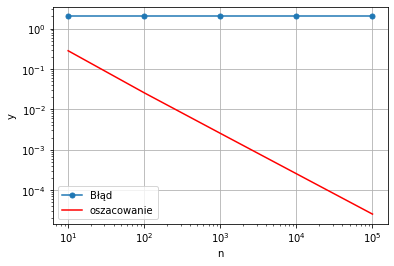

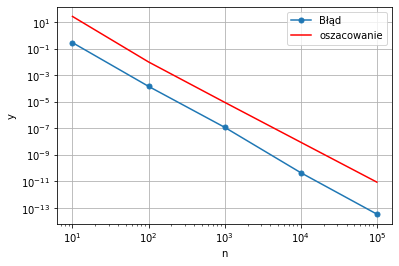

In [6]:
x = np.linspace(-1, 1, 1000)
y2 = f2(x)
y3 = f3(x)

v2 = 2
v3 = 2.102e4

interpolation_rank = [10, 100, 1000, 10000, 100000]
f2_norm = []
f3_norm = []

f2_error = []
f3_error = []

for nodes_number in interpolation_rank:
    cheb_nodes = main.chebyshev_nodes(nodes_number)
    cheb_weights = main.bar_czeb_weights(nodes_number)
    y2_cheb = f2(cheb_nodes)
    y3_cheb = f3(cheb_nodes)
    y2imp = main.barycentric_inte(cheb_nodes, y2_cheb, cheb_weights, x)
    y3imp = main.barycentric_inte(cheb_nodes, y3_cheb, cheb_weights, x)

    f2_norm.append(main.L_inf(y2,y2imp))
    f3_norm.append(main.L_inf(y3,y3imp))

    f2_error.append(4*v2/np.pi/(nodes_number - 1))
    f3_error.append(4*v3/3/np.pi/(nodes_number-3)**3)



plt.plot(interpolation_rank,f2_norm,'-o', markersize = 5, label = 'Błąd')
plt.plot(interpolation_rank,f2_error,'r',label = 'oszacowanie')
plt.xlabel("n")
plt.ylabel("y")
plt.legend(loc = 0)
plt.xscale("log")
plt.yscale("log")
plt.grid()
plt.show()


plt.plot(interpolation_rank,f3_norm,'-o', markersize = 5, label = 'Błąd')
plt.plot(interpolation_rank,f3_error,'r',label = 'oszacowanie')
plt.xlabel("n")
plt.ylabel("y")
plt.legend(loc = 0)
plt.xscale("log")
plt.yscale("log")
plt.grid()
plt.show()


***Zadanie 6.***  
Przeprowadzić analogiczną analizę dla funkcji analitycznych z [Zadania 2](#zad2). Wykres sporządzić w skali pół logarytmicznej (tylko oś y). 
Dla porównania umieścić na wykresie dodatkowo wykres oszacowania dla interpolacji funkcji analitycznych (zobacz wykład). W tym celu należy wyliczyć maksimum funkcji na przedziale $[-1,1]$ oraz największą elipsę, o ogniskach w punktach $(-1, j0)$ i $(1, j0)$, która nie zawiera pierwiastków mianownika funkcji.

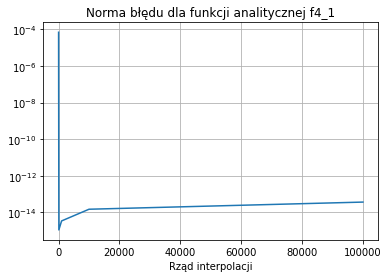

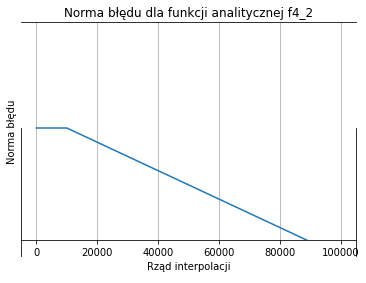

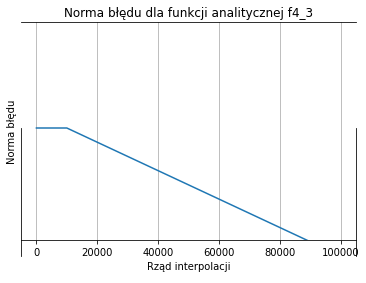

In [7]:
x = np.linspace(-1, 1, 1000)
y1 = f4_1(x)
y2 = f4_2(x)
y3 = f4_3(x)

interpolation_rank = [10, 100, 1000, 10000, 100000]
f1_norm = []
f2_norm = []
f3_norm = []

for nodes_number in interpolation_rank:
    cheb_nodes = main.chebyshev_nodes(nodes_number)
    cheb_weights = main.bar_czeb_weights(nodes_number)
    y1_cheb = f4_1(cheb_nodes)
    y2_cheb = f4_2(cheb_nodes)
    y2_cheb = f4_3(cheb_nodes)
    y1_imp = main.barycentric_inte(cheb_nodes,y1_cheb,cheb_weights,x)
    y2_imp = main.barycentric_inte(cheb_nodes,y2_cheb,cheb_weights,x)
    y3_imp = main.barycentric_inte(cheb_nodes,y3_cheb,cheb_weights,x)
    f1_norm.append(main.L_inf(y1,y1_imp))
    f2_norm.append(main.L_inf(y2,y2_imp))
    f3_norm.append(main.L_inf(y3,y3_imp))

plt.plot(interpolation_rank, f1_norm)
plt.yscale("log")
plt.xlabel("Rząd interpolacji")
plt.title("Norma błędu dla funkcji analitycznej f4_1")
plt.grid()
plt.show()

plt.plot(interpolation_rank, f2_norm)
plt.yscale("log")
plt.xlabel("Rząd interpolacji")
plt.ylabel("Norma błędu")
plt.title("Norma błędu dla funkcji analitycznej f4_2")
plt.grid()
plt.show()

plt.plot(interpolation_rank, f2_norm)
plt.yscale("log")
plt.xlabel("Rząd interpolacji")
plt.ylabel("Norma błędu")
plt.title("Norma błędu dla funkcji analitycznej f4_3")
plt.grid()
plt.show()



***Zadanie 7.***  
Dla funkcji nieciągłej z [Zadania 2](#zad2) przeanalizować efekt Gibbsa
oddzielnie dla parzystych i nieparzystych $n$. Oddzielnie wyliczyć jaki jest minimalny błąd niezależny od rzędu. Dlaczego wartości dla parzystych i nieparzystych $n$ się różnią?   
***Wskazówka:*** Wykonać wykres funkcji i jej funkcji interpolującej.

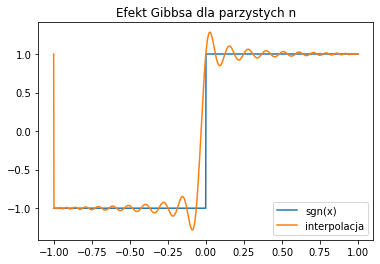

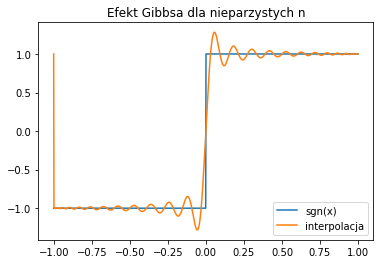

In [8]:
x = np.linspace(-1, 1, 1000)
y = f5(x)
N = 50
cheb_nodes_odd = main.chebyshev_nodes(N+1)
cheb_weights_odd = main.bar_czeb_weights(N+1)
y_odd = f5(cheb_nodes_odd)
y_imp_odd = main.barycentric_inte(cheb_nodes_odd, y_odd, cheb_weights_odd, x)

cheb_nodes_even = main.chebyshev_nodes(N)
cheb_weights_even = main.bar_czeb_weights(N)
y_even = f5(cheb_nodes_even)
y_imp_even = main.barycentric_inte(cheb_nodes_even, y_even, cheb_weights_even, x)

plt.plot(x, y)
plt.plot(x, y_imp_even)
plt.title("Efekt Gibbsa dla parzystych n")
plt.legend(["sgn(x)","interpolacja"])
plt.show()

plt.plot(x, y)
plt.plot(x, y_imp_odd)
plt.title("Efekt Gibbsa dla nieparzystych n")
plt.legend(["sgn(x)","interpolacja"])
plt.show()

W przypadku nieparzystego rzędu interpolacji, funkcja interpolująca przecina funkcję przybliżaną w punktach jej ciągłości.
Zaś dla parzystego rzędu interpolacji, funkcja przybliżana jest przecinana w punkcie nieciągłości.

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)


Wnioski:
Interpolacja wielomianowa ma wiele zastosowań. Jej niewątpliwym atutem jest to, że już dla relatywnie niskiego rzędu interpolacji osiągamy niski, w wielu aplikacjach zapewne zadowalający błąd. Minusem jest jej złożoność obliczeniowa kiedy chcemy osiągnąć maksymalnie niski (w granicach zera maszynowego) błąd przybliżenia.